In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import Counter
import operator
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import Pyro4

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import seaborn as sns

/Users/Peter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# First load the data into a pandas dataframe

In [3]:
tweets = pd.read_csv('Tweets-CustomerSupport.csv', sep=';',index_col='id')
#tweets = pd.read_csv('tweets-customer-support2.csv', sep=';',index_col='id')
tweets = tweets.drop_duplicates('tweetId')
tweets.columns = ['account','from_handler','to_handler','message','time_stamp','tweet_id']

In [4]:
tweets = pd.read_csv('Tweets-CustomerSupport.csv', sep=';',index_col='id')

In [5]:
#Get rid of duplicate tweets
tweets.drop_duplicates('tweetId')
tweets.head()

,account,fromHandler,toHandler,message,timestamp,tweetId
id,,,,,,
1,@1ShirtSupport,@1ShirtSupport,@PissedOffBiotic,@PissedOffBiotic You got it! Just email us you...,01/18/2016 05:09:13,688951251455754241
2,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Thanks for the info! Well check o...,01/18/2016 02:38:39,688913360679653376
3,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez Just want to make sure we have al...,01/18/2016 02:15:10,688907453212184576
4,@1ShirtSupport,@1ShirtSupport,@LordEstevez,@LordEstevez found it! It actually shows up as...,01/18/2016 02:14:24,688907258206367744
5,@1ShirtSupport,@1ShirtSupport,@LightingAshley,@LightingAshley It should be just about to be ...,01/18/2016 01:39:32,688898486025060352


In [6]:
#tweets[tweets.fromHandler=='@LordEstevez']['message'].iloc[0]

In [7]:
np.unique(tweets.account)

array(['@1ShirtSupport', '@Airbnb', '@AmazonHelp', '@AskAmex', '@Avis',
       '@BCBSIL', '@GoDaddyHelp', '@Hootsuite_Help', '@InstapaperHelp',
       '@JetBlue', '@Kohls', '@MasterCard', '@MicrosoftHelps',
       '@TmobileHelp', '@americanair', '@fedexhelp', '@nikestore',
       '@schuh', '@verizon'], dtype=object)

In [8]:
list(np.unique(tweets.account))

['@1ShirtSupport',
 '@Airbnb',
 '@AmazonHelp',
 '@AskAmex',
 '@Avis',
 '@BCBSIL',
 '@GoDaddyHelp',
 '@Hootsuite_Help',
 '@InstapaperHelp',
 '@JetBlue',
 '@Kohls',
 '@MasterCard',
 '@MicrosoftHelps',
 '@TmobileHelp',
 '@americanair',
 '@fedexhelp',
 '@nikestore',
 '@schuh',
 '@verizon']

In [9]:
def getToFromTweets(userAccount,toTweet=True):
    """Function to print the number of tweets from a given account"""
    if toTweet==True:
        toFrom = 'toHandler'
    else:
        toFrom = 'fromHandler'
    tweetNum = str(np.sum(tweets[toFrom]==userAccount))
    #tweetNum = str(np.sum(tweets['toHandler']==userAccount))
    if toTweet==True:
        print 'Tweets to %s: %s' % (userAccount, tweetNum)
    else:
        print 'Tweets from %s: %s' % (userAccount, tweetNum)

In [10]:
for i in list(np.unique(tweets.account)):
    getToFromTweets(i,False)

Tweets from @1ShirtSupport: 3204
Tweets from @Airbnb: 3202
Tweets from @AmazonHelp: 3216
Tweets from @AskAmex: 3201
Tweets from @Avis: 3219
Tweets from @BCBSIL: 3233
Tweets from @GoDaddyHelp: 3238
Tweets from @Hootsuite_Help: 3240
Tweets from @InstapaperHelp: 3229
Tweets from @JetBlue: 3200
Tweets from @Kohls: 3207
Tweets from @MasterCard: 3205
Tweets from @MicrosoftHelps: 3211
Tweets from @TmobileHelp: 0
Tweets from @americanair: 0
Tweets from @fedexhelp: 0
Tweets from @nikestore: 3204
Tweets from @schuh: 3231
Tweets from @verizon: 3243


In [11]:
for i in list(np.unique(tweets.account)):
    getToFromTweets(i,True)

Tweets to @1ShirtSupport: 532
Tweets to @Airbnb: 23
Tweets to @AmazonHelp: 2991
Tweets to @AskAmex: 43
Tweets to @Avis: 360
Tweets to @BCBSIL: 78
Tweets to @GoDaddyHelp: 526
Tweets to @Hootsuite_Help: 180
Tweets to @InstapaperHelp: 38
Tweets to @JetBlue: 75
Tweets to @Kohls: 681
Tweets to @MasterCard: 38
Tweets to @MicrosoftHelps: 653
Tweets to @TmobileHelp: 0
Tweets to @americanair: 0
Tweets to @fedexhelp: 0
Tweets to @nikestore: 6295
Tweets to @schuh: 495
Tweets to @verizon: 71


In [12]:
companyList = list(np.unique(tweets.account))
companyList.append('@TMobileHelp')
companyList.append('@AmericanAir')
companyList.append('@FedExHelp')

companyList
#list(np.unique(tweets.fromHandler))

['@1ShirtSupport',
 '@Airbnb',
 '@AmazonHelp',
 '@AskAmex',
 '@Avis',
 '@BCBSIL',
 '@GoDaddyHelp',
 '@Hootsuite_Help',
 '@InstapaperHelp',
 '@JetBlue',
 '@Kohls',
 '@MasterCard',
 '@MicrosoftHelps',
 '@TmobileHelp',
 '@americanair',
 '@fedexhelp',
 '@nikestore',
 '@schuh',
 '@verizon',
 '@TMobileHelp',
 '@AmericanAir',
 '@FedExHelp']

In [13]:
usrIdx = tweets['fromHandler'].isin(companyList)
usrTweets = tweets[~usrIdx]
compTweets = tweets[usrIdx]
#tweets[tweets['fromHandler'].isin(list(np.unique(tweets.account)))]

In [14]:
verTweets = tweets[tweets.fromHandler=='@verizon']

In [15]:
#pd.to_datetime(tweets.timestamp)

# Gensim code

In [16]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
#import os
#import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import timeit
from re import sub
import pyLDAvis.gensim
from collections import Counter

In [17]:
#Functions for data cleaning

wnl = WordNetLemmatizer()

def removePunc(myWord):
    """Function to remove punctuation from string inputs"""
    if myWord is None:
        return myWord
    else:
        return sub('[.:;()/!&-*@$,?^\d+]','',myWord)
        
def removeAscii(myWord):
    """Function to remove ascii from string input"""
    if myWord is None:
        return myWord
    else:
        return str(sub(r'[^\x00-\x7F]+','', myWord.decode('utf-8').strip()))

def lemmatize(myWord):
    """Function to lemmatize words"""
    if myWord is None:
        return myWord
    else:
        return wnl.lemmatize(myWord)

def removeStopWords(myWord):
    """Function to remove stop words"""
    if myWord is None:
        return myWord
    if myWord not in str(stopwords.words('english')):
        return myWord

def removeLinkUser(myWord):
    """Function to remove web addresses and twitter handles"""
    if not myWord.startswith('@') and not myWord.startswith('http'):
        return myWord

def prepText(myWord):
    """Final text pre-processing function"""
    return removeStopWords(
        lemmatize(
            removeAscii(
                removePunc(
                    removeLinkUser(
                        myWord.lower()
                    )
                )
            )
        )
    )


In [18]:
# Function to clean/filter all tweets

def filterTweetList(tweetList):
    """Remove stop words, lemmatize, and clean all tweets"""
    return [[prepText(word) for word
                in tweet.split()
                    if prepText(word) is not None]
                for tweet in tweetList]
cleanTweetList = filterTweetList(tweets['message'])

In [19]:
%%timeit
# Using iterator:             10 loops, best of 3: 137 ms per loop
# Using double list comprhxn: 10 loops, best of 3: 141 ms per loop

# Iterator
for tweet in (tweet for tweet in verTweets['message']):
    [word.lower() for word in tweet.split() if word not in str(stopwords.words('english')) and not word.startswith('@') and not word.startswith('http')]
#[[word.lower() for word in tweet.split() if word not in stopwords.words('english') and not word.startswith('@') and not word.startswith('http')] for tweet in verTweets['message']]


1 loops, best of 3: 9.58 s per loop


### Using an iterator doesn't speed up the data cleaning

## Wanted to check the speed saved by parallelization using `%%timeit`
#### Without multicore:  
_Code_  
`lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=50, passes=10, iterations=50,alpha=0.001)`  

_`Output from %%timeit`_  
`1 loops, best of 3: 11min 10s per loop`

#### With multicore:  
_Code_  
`lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50, passes = 10,iterations=50,alpha=0.001)`  
_`Output from %%timeit`_  
`1 loops, best of 3: 6min 17s per loop`  



# Bottom line: _multicore LDA is about twice as fast_


In [20]:
def makeDict(myTweetList):
    """Create dictionary from list of tokenized documents"""
    return corpora.Dictionary(myTweetList)

def makeCorpus(myTweetList,myDict):
    """Create corpus from list of tokenized documents"""
    return [myDict.doc2bow(tweet) for tweet in myTweetList]

def createLDA(myCorpus, myDictionary,myTopics=50,myPasses=10,myIterations=50,myAlpha=0.001):
    """LDA model call function"""
    return models.LdaMulticore(myCorpus, id2word=myDictionary, num_topics=myTopics, passes=myPasses,
    iterations=myIterations,alpha=myAlpha)

    
#lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=50, passes=10,
#    iterations=50,alpha=0.001)


#lsi = models.LsiModel(myCorpus, id2word=myDict, num_topics=50)

#myDict = makeDict(tweetList)
#myCorpus = makeCorpus(tweetList)
#dictionary = corpora.Dictionary(tweetList)

In [21]:
myDict = makeDict(cleanTweetList)
myCorpus = makeCorpus(cleanTweetList, myDict)
myLda = createLDA(myCorpus, myDict)

In [22]:
myLda = createLDA(myCorpus, myDict)

In [23]:
saveDir = '/Users/Peter/git/insight/projMsgAi/'
myDict.save(saveDir + "tweet_dict.dict")

In [24]:
#lda = models.LdaMulticore(myCorpus, id2word=myDict, num_topics=50, passes=10,
#    iterations=50,alpha=0.001)

In [25]:
#topTopics = lda.top_topics(corpus)

In [26]:
# turn on automatic rendering of visualizations
pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(myLda, myCorpus, myDict)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
25     4.761290        1       1 -0.274979  0.064185
40     3.787690        1       2 -0.095916 -0.103561
31     3.302194        1       3 -0.031021 -0.079173
42     3.229411        1       4 -0.141220  0.007739
28     2.973535        1       5  0.048338  0.177057
4      2.841976        1       6 -0.254042  0.011863
2      2.822202        1       7 -0.247367  0.041336
15     2.694232        1       8  0.027393 -0.027712
12     2.659543        1       9 -0.056853 -0.049087
22     2.580476        1      10 -0.043165  0.000512
13     2.534281        1      11 -0.168905 -0.000977
38     2.457162        1      12  0.052404 -0.113817
16     2.397783        1      13  0.043601  0.136363
10     2.394782        1      14  0.052373 -0.023579
29     2.353278        1      15  0.054208 -0.147127
34     2.221013        1      16 -0.077961 -0.084659
9      1.994277        1      17 -0.096358 -0.004181
33     1.966843        1      18  0.076134 -0.111298
21     1.901867        1      19  0.048815  0.026719
26     1.900901        1      20  0.074870 -0.067467
36     1.875320        1      21 -0.200899  0.031483
39     1.839824        1      22  0.093720 -0.028590
18     1.814265        1      23  0.040831  0.093680
41     1.811730        1      24  0.064332 -0.137886
14     1.781669        1      25  0.069811 -0.146143
6      1.765083        1      26  0.022443 -0.014208
43     1.758106        1      27 -0.060190  0.032576
45     1.744101        1      28  0.044485 -0.060257
3      1.742336        1      29  0.006491 -0.123842
37     1.696779        1      30  0.113904  0.147630
47     1.694802        1      31  0.030569 -0.005095
1      1.672657        1      32 -0.075259 -0.068102
32     1.613592        1      33  0.074732 -0.033943
44     1.583054        1      34 -0.116341  0.024598
7      1.572563        1      35  0.084811 -0.060622
30     1.568991        1      36  0.133011  0.146038
49     1.528210        1      37 -0.009018  0.126469
17     1.514700        1      38  0.100306  0.049098
20     1.469425        1      39  0.048877  0.037987
0      1.428498        1      40  0.040421  0.069509
8      1.412094        1      41  0.122986  0.159890
19     1.401455        1      42 -0.024713  0.061674
35     1.395007        1      43  0.031356  0.019892
48     1.361138        1      44  0.034250 -0.064654
23     1.308472        1      45  0.095489 -0.039459
11     1.287245        1      46  0.079755 -0.116451
5      1.261027        1      47  0.038255  0.119997
24     1.247613        1      48  0.086075  0.053003
27     1.063764        1      49  0.028345  0.043916
46     1.011743        1      50  0.010813  0.028677, topic_info=      Category         Freq         Term  Total  loglift  logprob
2071   Default  5902.000000       thanks   5902  30.0000  30.0000
3437   Default  6315.000000        sorry   6315  29.0000  29.0000
27790  Default  5192.000000         know   5192  28.0000  28.0000
8169   Default  5271.000000          let   5271  27.0000  27.0000
8766   Default  8128.000000           dm   8128  26.0000  26.0000
16830  Default  4521.000000         look   4521  25.0000  25.0000
8375   Default  3390.000000        email   3390  24.0000  24.0000
12524  Default  3543.000000         hear   3543  23.0000  23.0000
7222   Default  3736.000000        happy   3736  22.0000  22.0000
26527  Default  3876.000000        check   3876  21.0000  21.0000
22807  Default  2777.000000        youre   2777  20.0000  20.0000
24061  Default  2591.000000         need   2591  19.0000  19.0000
24917  Default  2914.000000        thank   2914  18.0000  18.0000
26197  Default  3430.000000        phone   3430  17.0000  17.0000
7861   Default  4001.000000       number   4001  16.0000  16.0000
5022   Default  3560.000000         like   3560  15.0000  15.0000
7446   Default  3373.000000         take   3373  14.0000  14.0000
25481  Defaul

In [27]:
# This is a problem. I need to make a new list of cleaned tweets.
cleanUsrTweetList = filterTweetList(usrTweets['message'])
usrDict   = makeDict(cleanUsrTweetList)
usrCorpus = makeCorpus(cleanUsrTweetList, usrDict)
usrLda = createLDA(usrCorpus, usrDict)


In [28]:
pyLDAvis.gensim.prepare(usrLda, usrCorpus, usrDict)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
3      3.724364        1       1  0.174702 -0.063988
6      3.309468        1       2  0.133972 -0.013186
41     3.000995        1       3  0.117706  0.013426
9      2.996661        1       4  0.170147 -0.033040
40     2.825737        1       5 -0.194085 -0.285814
25     2.808502        1       6  0.180859 -0.047815
8      2.774779        1       7 -0.179091 -0.242911
15     2.523343        1       8 -0.183269  0.008907
28     2.450629        1       9  0.121873 -0.016168
4      2.353015        1      10  0.115621 -0.053061
22     2.350300        1      11 -0.016201  0.067638
32     2.323791        1      12  0.087117 -0.018736
21     2.260467        1      13  0.113045  0.034342
13     2.220804        1      14  0.104942 -0.052904
19     2.157262        1      15 -0.066367  0.029584
1      2.092444        1      16 -0.080461 -0.052267
18     2.075981        1      17  0.141393 -0.058822
29     2.074772        1      18  0.118751 -0.076911
45     2.057544        1      19 -0.023218  0.070888
39     2.037177        1      20 -0.069294  0.135061
36     2.032982        1      21  0.088752 -0.017805
14     1.997094        1      22  0.084401  0.024780
37     1.996821        1      23  0.015976  0.017038
43     1.948766        1      24  0.045311 -0.005764
17     1.946985        1      25 -0.212458 -0.050695
12     1.923483        1      26  0.002743 -0.020184
46     1.914602        1      27 -0.140433  0.137000
47     1.853289        1      28 -0.044485  0.052327
35     1.831946        1      29  0.022045  0.071478
34     1.773201        1      30 -0.041270  0.022943
0      1.754519        1      31  0.092248 -0.077980
48     1.746086        1      32 -0.120397  0.102831
2      1.705999        1      33 -0.089342 -0.146172
30     1.695682        1      34 -0.110476  0.094980
20     1.695064        1      35  0.023733  0.060921
24     1.687122        1      36  0.080240 -0.024946
5      1.652019        1      37  0.058668 -0.010043
26     1.631626        1      38 -0.017440  0.023807
42     1.622372        1      39 -0.109376 -0.029670
16     1.580886        1      40  0.021059  0.032305
49     1.529869        1      41 -0.104998  0.063178
11     1.519858        1      42  0.017812  0.049051
44     1.517197        1      43 -0.024119  0.022592
10     1.480126        1      44 -0.026043  0.042147
7      1.450002        1      45  0.029197  0.052338
38     1.447194        1      46 -0.137304 -0.040872
31     1.325381        1      47 -0.001415  0.059867
27     1.232683        1      48 -0.080055  0.040643
33     1.216356        1      49 -0.053821  0.059181
23     0.872755        1      50 -0.036895  0.050501, topic_info=      Category         Freq        Term  Total  loglift  logprob
4340   Default  1682.000000         air   1682  30.0000  30.0000
5935   Default  1140.000000      jordan   1140  29.0000  29.0000
4423   Default   897.000000      thanks    897  28.0000  28.0000
11697  Default  1162.000000        nike   1162  27.0000  27.0000
10000  Default   802.000000        back    802  26.0000  26.0000
926    Default  1052.000000        time   1052  25.0000  25.0000
1267   Default   897.000000         one    897  24.0000  24.0000
7029   Default   525.000000       thank    525  23.0000  23.0000
11484  Default   592.000000           -    592  22.0000  22.0000
1345   Default   447.000000        take    447  21.0000  21.0000
4971   Default   426.000000        size    426  20.0000  20.0000
13180  Default   509.000000       style    509  19.0000  19.0000
2199   Default   528.000000        kobe    528  18.0000  18.0000
6282   Default   476.000000        game    476  17.0000  17.0000
5771   Default   812.000000        help    812  16.0000  16.0000
5375   Default   421.000000          cp    421  15.0000  15.0000
11061  Default   445.000000     limited    445  14.0000  14.0000
12960  Default   418.000000    

In [29]:
cleanCompTweetList = filterTweetList(compTweets['message'])
compDict   = makeDict(cleanCompTweetList)
compCorpus = makeCorpus(cleanCompTweetList, compDict)


In [30]:
compLda = createLDA(compCorpus, compDict)

In [31]:
pyLDAvis.gensim.prepare(compLda, compCorpus, compDict)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
38     6.228145        1       1 -0.308584  0.059895
2      4.016333        1       2 -0.279744  0.045385
5      3.791605        1       3 -0.155674 -0.016726
39     3.670107        1       4 -0.032042  0.048742
12     3.129544        1       5 -0.117166  0.178781
26     2.984047        1       6  0.046332 -0.050326
21     2.897902        1       7 -0.034191  0.030790
42     2.785962        1       8 -0.120542  0.081226
33     2.678118        1       9 -0.161266 -0.092171
23     2.533816        1      10 -0.124592  0.103797
27     2.525157        1      11  0.055689  0.013383
9      2.320664        1      12 -0.161838  0.009133
1      2.227735        1      13  0.119372  0.167557
35     2.214965        1      14 -0.043049 -0.094821
3      2.144372        1      15  0.063302  0.108255
25     2.121094        1      16  0.131414  0.113582
31     2.097594        1      17  0.137746  0.162668
6      2.091668        1      18  0.040977  0.036364
47     2.013927        1      19 -0.054360 -0.211221
8      1.940987        1      20 -0.144022  0.065337
37     1.863762        1      21  0.025455  0.016720
48     1.841533        1      22 -0.027104 -0.071787
22     1.772538        1      23  0.064847  0.044429
28     1.732557        1      24 -0.084288  0.107691
11     1.719792        1      25  0.005059 -0.034961
20     1.711983        1      26  0.087833  0.126133
41     1.688666        1      27  0.031797  0.093043
10     1.670232        1      28 -0.038576 -0.117640
40     1.567940        1      29  0.069239 -0.101356
49     1.538339        1      30  0.004091  0.040111
32     1.505054        1      31  0.064630 -0.087520
15     1.504242        1      32  0.041825  0.025500
43     1.483158        1      33  0.027234 -0.099172
4      1.432573        1      34 -0.045943 -0.076757
17     1.430528        1      35  0.066334  0.018517
19     1.416056        1      36 -0.039858 -0.135183
29     1.410551        1      37  0.091041 -0.033266
14     1.404508        1      38  0.091156 -0.023579
34     1.399888        1      39 -0.001284 -0.063766
45     1.387163        1      40 -0.017136 -0.097512
18     1.385601        1      41  0.034487 -0.060239
46     1.317928        1      42  0.057109  0.034062
30     1.265455        1      43  0.026029 -0.010049
7      1.255961        1      44  0.097450 -0.004383
13     1.209547        1      45  0.085965 -0.104209
16     1.158072        1      46  0.093097 -0.087596
44     1.140833        1      47  0.097243  0.008888
24     1.138902        1      48  0.134950  0.061252
0      1.120128        1      49  0.093596 -0.072540
36     1.112766        1      50  0.005957 -0.054460, topic_info=      Category         Freq         Term  Total  loglift  logprob
10019  Default  6221.000000        sorry   6221  30.0000  30.0000
19695  Default  4756.000000         know   4756  29.0000  29.0000
3855   Default  4961.000000          let   4961  28.0000  28.0000
16135  Default  3648.000000        check   3648  27.0000  27.0000
5647   Default  7782.000000           dm   7782  26.0000  26.0000
16101  Default  3495.000000         hear   3495  25.0000  25.0000
17835  Default  3810.000000       number   3810  24.0000  24.0000
10917  Default  2651.000000        youre   2651  23.0000  23.0000
1778   Default  2926.000000         take   2926  22.0000  22.0000
14708  Default  3096.000000         like   3096  21.0000  21.0000
12141  Default  1990.000000       assist   1990  20.0000  20.0000
11574  Default  2389.000000        thank   2389  19.0000  19.0000
1339   Default  2934.000000      address   2934  18.0000  18.0000
13211  Default  9170.000000       please   9170  17.0000  17.0000
1287   Default  2351.000000         team   2351  16.0000  16.0000
7902   Default  2209.000000        issue   2209  15.0000  15.0000
14907  Default  2187.000000       detail   2187  14.0000  14.0000
15152  Defaul

In [32]:
kagTweets = pd.read_csv('kaggleTweets.csv')

In [33]:
cleanKagTweetList = filterTweetList(kagTweets['text'])
kagDict   = makeDict(cleanKagTweetList)
kagCorpus = makeCorpus(cleanKagTweetList, kagDict)
kagLda = createLDA(kagCorpus, kagDict)

In [34]:
kagLda = createLDA(kagCorpus, kagDict)

In [35]:
kagVis = pyLDAvis.gensim.prepare(kagLda, kagCorpus, kagDict)

In [36]:
kagIndex = MatrixSimilarity(kagLda[kagCorpus]) # transform corpus to LSI space and index it
#kagSims = myIndex[myVec_lda] # perform a similarity query against the corpus
#kagSims = sorted(enumerate(sims), key=lambda item: -item[1])



In [37]:
kagIndex.index.shape

(14640, 50)

In [38]:
# access the first topic
len(kagIndex.index[0,:])
kagLda.show_topic(0)

[(u'terrible', 0.019533689709535302),
 (u'flight', 0.018736979917812223),
 (u'plane', 0.016656590569718341),
 (u'might', 0.016341041212148043),
 (u'issue', 0.013588114593312548),
 (u'get', 0.012600665004952565),
 (u'upset', 0.01237314538575319),
 (u'really', 0.012295766127600229),
 (u'maintenance', 0.011032376138205787),
 (u'delay', 0.010776405600225763)]

# Using `top_topics` maps lda topics to the visualization

In [47]:
# topic (tuple) 39 is equal to 1 in the visualization
#kagLda.show_topics(10)
#kagTopTopics = kagLda.top_topics(kagCorpus)
#kagLda.print_topics(10)
#agLda.show_topic(0)
#kagTopTopics

In [40]:
def myTest(t1,t2):
    return t1, t2
testVar=myTest('hi','there')


# Try to match the indices between gensim and pyLDAvis

In [41]:
#idxDf = pd.DataFrame(columns=['first','second','third'])


In [42]:
idxShufDf = pd.DataFrame(columns=['first','second','third'])
kagShowTopics = kagLda.show_topics(50)
for i in range(len(kagLda.show_topics(50))):
    idxShufDf.loc[i,'first']=kagShowTopics[i][1].split()[0].split('*')[1]
    idxShufDf.loc[i,'second']=kagShowTopics[i][1].split()[2].split('*')[1]
    idxShufDf.loc[i,'third']=kagShowTopics[i][1].split()[4].split('*')[1]
idxShufDf.head()

,first,second,third
0,terrible,flight,plane
1,apology,appreciate,friend
2,hour,phone,service
3,dm,sent,response
4,ever,worst,flight


In [43]:
idxTopDf = pd.DataFrame(columns=['first','second','third'])
for i in range(len(kagTopTopics)):
    idxTopDf.loc[i,'first']=kagTopTopics[i][0][0][1] 
    idxTopDf.loc[i,'second']=kagTopTopics[i][0][1][1] 
    idxTopDf.loc[i,'third']=kagTopTopics[i][0][2][1] 

idxTopDf.head()

,first,second,third
0,flight,cancelled,flightled
1,hour,minute,flight
2,flight,late,flightr
3,ever,worst,flight
4,service,customer,agent


In [44]:
#works
#idxShufDf.loc[39,['first','second','third']] == idxTopDf.loc[0,['first','second','third']]
print idxShufDf.loc[39,'first'] == idxTopDf.loc[0,'first']
print idxShufDf.loc[39,'second'] == idxTopDf.loc[0,'second']
print idxShufDf.loc[39,'third'] == idxTopDf.loc[0,'third']

idxShufDf.loc[39,'first'] == idxTopDf.loc[0,'first'] and idxShufDf.loc[39,'second'] == idxTopDf.loc[0,'second'] and idxShufDf.loc[39,'third'] == idxTopDf.loc[0,'third']
#    print 'yes'
#idxShufDf.loc[39,'first'] == idxTopDf.loc[0,'first'] and print idxShufDf.loc[39,'second'] == idxTopDf.loc[0,'second'] and print idxShufDf.loc[39,'third'] == idxTopDf.loc[0,'third']


False
False
False


False

In [45]:
#works
#idxTopDf[idxTopDf['first'] == idxShufDf['first'] ]
idxTopDf[(idxTopDf['first'] == idxShufDf['first']) & (idxTopDf['second'] == idxShufDf['second']) & (idxTopDf['third'] == idxShufDf['third'])]

,first,second,third
30,flight,cancelled,today


In [46]:
str(idxTopDf.loc[0,'first']) in 

SyntaxError: invalid syntax (<ipython-input-46-abee70b32a59>, line 1)

In [ ]:
idxTopDf.loc[0,'first'] in list(idxShufDf['first'])

# Now just do this in a loop to get the index matching

In [ ]:
list(idxShufDf['first']).index(idxTopDf.loc[0,'first'])

In [ ]:
list(idxShufDf['second']).index(idxTopDf.loc[0,'second'])

In [ ]:
list(idxShufDf['third']).index(idxTopDf.loc[0,'third'])

In [ ]:
list(idxShufDf['first'])[39]

In [ ]:
idxTopDf.loc[0,'third']

In [ ]:
list(idxShufDf['first'])[0]

In [ ]:
idxShufDf.loc[[10,2,30]]

In [ ]:
translateIdx = []

for j in range(50):
    for i in range(50):
        if list(idxShufDf['first'])[i] == idxTopDf.loc[j,'first']:
            if list(idxShufDf['second'])[i] == idxTopDf.loc[j,'second']:
                if list(idxShufDf['third'])[i] == idxTopDf.loc[j,'third']:              
                    translateIdx.append(i)
#                    print i, j
#        else:
#            print 'no'

In [ ]:
#testChange = pd.Series(translateIdx)
#print testChange
#print testChange.sort_values()

In [ ]:
"""
translateIdx = []

for j in range(50):
    for i in range(50):
        if list(idxShufDf['first'])[i] == idxTopDf.loc[j,'first']:
            if list(idxShufDf['second'])[i] == idxTopDf.loc[j,'second']:
                if list(idxShufDf['third'])[i] == idxTopDf.loc[j,'third']:              
                    translateIdx.append(i)
                    #print i, j
"""

In [ ]:
# This one is good for first translate index
translateIdx2 = []

for j in range(50):
    for i in range(50):
        if list(idxShufDf['first'])[j] == idxTopDf.loc[i,'first']:
            if list(idxShufDf['second'])[j] == idxTopDf.loc[i,'second']:
                if list(idxShufDf['third'])[j] == idxTopDf.loc[i,'third']:              
                    translateIdx2.append(i)
                    #print i, j

In [ ]:
# This one is good for second translate index
translateIdx = []

for j in range(50):
    for i in range(50):
        if list(idxShufDf['first'])[i] == idxTopDf.loc[j,'first']:
            if list(idxShufDf['second'])[i] == idxTopDf.loc[j,'second']:
                if list(idxShufDf['third'])[i] == idxTopDf.loc[j,'third']:              
                    translateIdx.append(i)
                    #print i, j

In [ ]:
print translateIdx, translateIdx2


In [ ]:

testL = []
testL.append(1)
testL

In [ ]:
list(idxShufDf['first'])
for i in range(50):
    if list(idxShufDf['first'])[i] == idxTopDf.loc[0,'first']:
        if list(idxShufDf['second'])[i] == idxTopDf.loc[0,'second']:
            if list(idxShufDf['third'])[i] == idxTopDf.loc[0,'third']:              
                continue
#                print 'yes!'
#    else:
#        print 'no'
    

In [ ]:
#for i, j in enumerate(list(idxShufDf['first'])):
#    print i, j
#    if j == idxTopDf.loc[0,'first']:
#        print 'yes!'

In [ ]:
#for i, j in enumerate(['foo', 'bar', 'baz']):
#    print j
#    print i

In [ ]:
#for i in range(50):
#    print list(idxShufDf['first']).index(idxTopDf.loc[i,'first'])

In [ ]:
#idxTopDf.loc[0,'first']
#list(idxShufDf['first'])

In [ ]:
print idxTopDf.loc[12,:]
print idxShufDf.loc[12,:]


#idxTopDf['first']

In [431]:
#

In [430]:
#kagTopTopics[0]("$$TEXT$$")

### Next sort tweets according to the topic abundance

In [146]:
kagLda[kagCorpus][13000]

[(44, 0.99304964539007079)]

In [184]:
from gensim.matutils import corpus2csc, sparse2full, corpus2dense
kagSparse = corpus2csc(kagCorpus)
#kagDense = corpus2dense(kagCorpus,14640)
kagDense = corpus2dense(kagLda[kagCorpus],50)


#kagSparse.todense()[1000].shape
#kagFull = sparse2full(kagSparse,173)

In [187]:
#Documents are columns
print sum(kagDense[:,5000])
print sum(kagDense[49,:])

0.995927594602
182.184433594


### Need to make sure the topic names are right.
### Also, transpose the dataframe

In [563]:
kagDf = pd.DataFrame(kagDense)
kagDf.head()
kagDf.shape


(50, 14640)

In [564]:
# I think I may need to add 1 to all the indices

kagSortedDf = kagDf.transpose()
#kagSortedDf = kagDf.transpose()[translateIdx]
#kagSortedDf.columns = [i + 1 for i in translateIdx]
kagSortedDf.sort_values(39,ascending=False).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
14535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [537]:
kagTweets.loc[14216]

tweet_id                                                       569651818453708800
airline_sentiment                                                        negative
airline_sentiment_confidence                                               0.6708
negativereason                                                   Cancelled Flight
negativereason_confidence                                                  0.6708
airline                                                                  American
airline_sentiment_gold                                                        NaN
name                                                                     McKennon
negativereason_gold                                                           NaN
retweet_count                                                                   0
text                            @AmericanAir Flight's Cancelled Flightled. Web...
tweet_coord                                                                   NaN
tweet_created   

In [567]:
kagSortedDf = kagDf.transpose()[translateIdx]

In [568]:
kagSortedDf.columns = ['col' + str(i + 1) for i in range(50)]
kagSortedDf.sort_values('col1',ascending=False).head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50
14535,0.996744,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14216,0.996512,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13511,0.995934,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12581,0.995934,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13813,0.995934,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [573]:
#kagDf.loc[12593]
kagTweets.loc[14535,'text']

'@AmericanAir Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!'

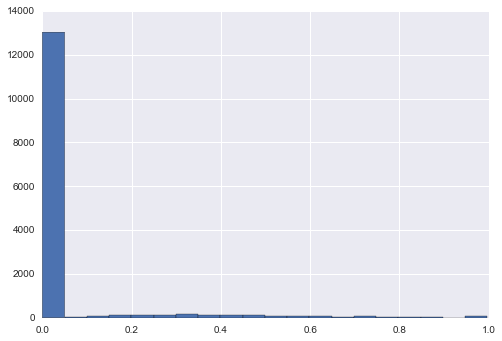

In [577]:
kagSortedDf['col1'].hist(bins=20)

In [ ]:
#cleanKagTweetList
#list(kagSortedDf[kagSortedDf.col1>0.1].index)
#kagTweets.loc[list(set(kagSortedDf[kagSortedDf.col1>0.1].index))]['text']

In [ ]:
#srtTweets = list(kagCleanArray[srtIdx])
#' '.join([' '.join(string) for string in srtTweets])

In [621]:
' '.join(['s','b'])

's b'

In [609]:
kagCleanArray = np.array(cleanKagTweetList)
#kagCleanArray
srtIdx = list(kagSortedDf[kagSortedDf.col1>0.1].index)

print len(list(kagCleanArray[srtIdx]))
print len(kagCleanArray)

1578
14640


In [610]:
from wordcloud import WordCloud

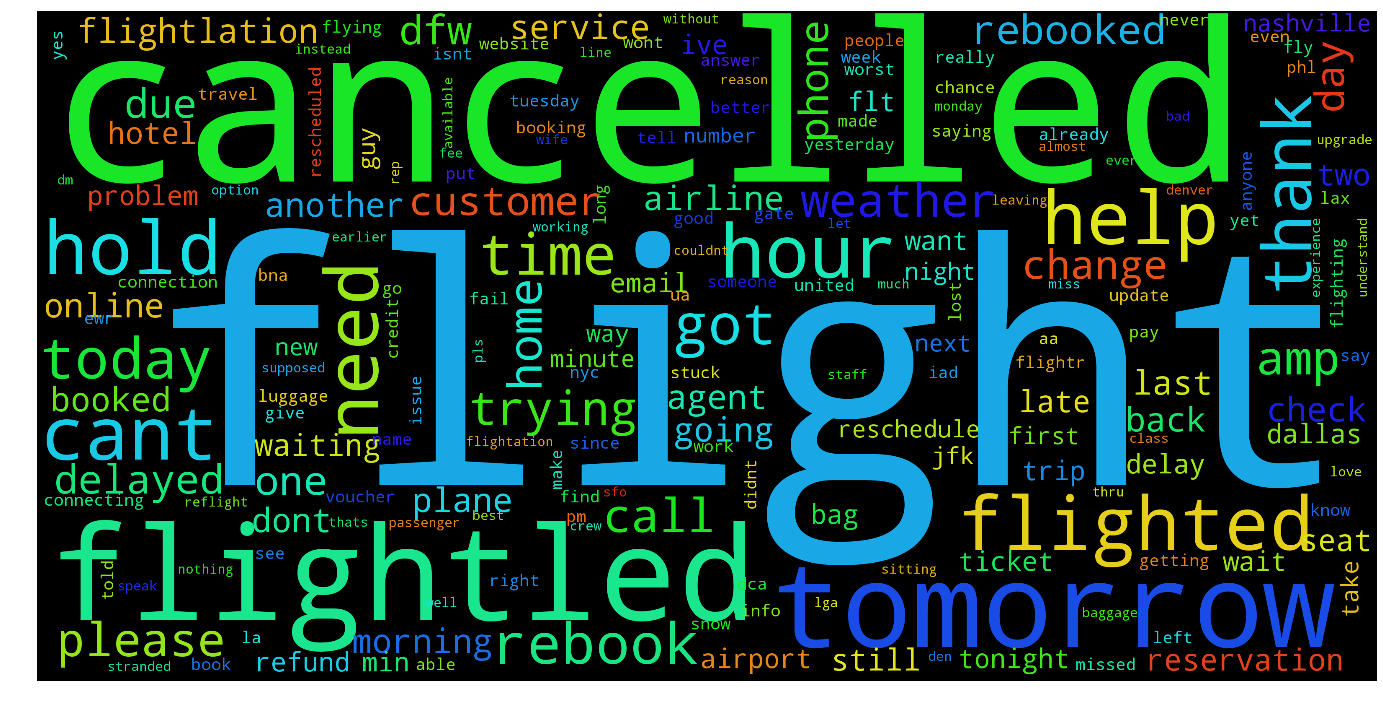

In [626]:
wordcloud = WordCloud(max_font_size=100,scale=8).generate(' '.join([' '.join(string) for string in srtTweets]))

fig = plt.figure(figsize=(24,18), dpi=1600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
>>> import numpy as np
>>> a = np.array([-2, 1, 5, 3, 8, 5, 6])
>>> b = [1, 2, 5]
>>> print list(a[b])
[1, 5, 5]

In [574]:
#kagDf.iloc[translateIdx].reset_index()

In [222]:
#np.sort(kagDf.loc[39,])
kagDf.sort_values()

array([ 0.        ,  0.        ,  0.        , ...,  0.99593359,
        0.99651247,  0.99674422], dtype=float32)

# Try to implement bigrams into analysis

In [ ]:
from gensim.models.phrases import Phrases
from gensim import similarities


In [ ]:
def getBigram(myTweetlist):
    bigram = Phrases(tweetList)
    return [bigram[tweet] for tweet in myTweetlist]

In [ ]:
cleanTweets = filterTweetList(tweets['message'])
bigramTweetList = getBigram(cleanTweets)

In [ ]:
bigramDict = makeDict(bigramTweetList)
bigramCorpus = makeCorpus(bigramTweetList)

#bigramDict = bigramDict.compactify()
bigramLda = createLDA(myCorpus = bigramCorpus, myDictionary = bigramDict)
#dictionary.

#createLDA()

In [ ]:
bigramDict = makeDict(bigramTweetList)
bigramLda = createLDA(myCorpus = bigramCorpus, myDictionary = bigramDict)

In [ ]:
#bigramDict = bigramDict.compactify()

In [ ]:
pyLDAvis.gensim.prepare(bigramLda, bigramCorpus, bigramDict)

# Code for single tweet validation 

In [ ]:
# First, build index in order to query the model

myIndex = MatrixSimilarity(lda[myCorpus]) # transform corpus to LSI space and index it
sims = myIndex[myVec_lda] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])



In [ ]:
# Function for tweet validation

def validateTweet(testTweet, myDict=myDict, myLda=lda ):
    myDoc = ' '.join([prepText(word) for word in testTweet.split() if prepText(word) is not None])    
    myVec_bow = myDict.doc2bow(myDoc.lower().split())
    myVec_lda = myLda[myVec_bow]
    sims = myIndex[myVec_lda] # perform a similarity query against the corpus
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    matchIdx = [i[0] for i in sims[1:300]]
    topHandlers = list(tweets.iloc[matchIdx]['fromHandler'])
    return topHandlers

validateTweet("@JennyMcCarthy #dsf I wrote a children's book about bullying. It's on Amazon. Want to help promote it?!? The Bully's Nightmare")

In [ ]:
#Trial tweet for validation

myDoc = '@saracozart No need to continue the struggle. Were here and we can help. DM us for info about switching. http://spr.ly/6017BkrjL* OMV'
myDocOrig = "@ATT @ATTCares I have been on hold for one hour & 11minutes. This is a little excessive. Worst customer service I've ever received."
myDoc = ' '.join([prepText(word) for word in myDoc.split() if prepText(word) is not None])
print myDoc                
myVec_bow = myDict.doc2bow(myDoc.lower().split())
#myVec_bow = dictionary.doc2bow(myDoc.lower().split())
myVec_lda = lda[myVec_bow]
print(myVec_lda)

In [ ]:
# Find the best 300 tweet matches
matchIdx = [i[0] for i in sims[1:300]]
topHandlers = list(tweets.iloc[matchIdx]['fromHandler'])

In [ ]:
#>>> sims = myIndex[myVec_lda] # perform a similarity query against the corpus
#>>> print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples

In [ ]:
#>>> sims = sorted(enumerate(sims), key=lambda item: -item[1])
#>>> print(sims) # print sorted (document number, similarity score) 2-tuples

In [ ]:
# Find the best 300 tweet matches
#matchIdx = [i[0] for i in sims[1:300]]


In [ ]:
topHandlerCounts = Counter(topHandlers)
sortedHandlers = sorted(topHandlerCounts.items(), key=lambda x: x[1],reverse=True)[0:5]

handlerNames = [handler[0] for handler in sortedHandlers]
handlerCounts = [handler[1] for handler in sortedHandlers]

indexes = np.arange(len(handlerNames))
width = 0.9
plt.bar(indexes, handlerCounts, width)
plt.xticks(indexes + width * 0.5, handlerNames)
plt.ylabel('Frequency',fontsize=16)

# Plot histogram using matplotlib bar().
#indexes = np.arange(len(author_names))
#width = 0.7
#plt.bar(indexes, author_counts, width)
#plt.xticks(indexes + width * 0.5, author_names)
plt.show()
#

In [ ]:
#Trial tweet for validation LSI

myDoc = '@saracozart No need to continue the struggle. Were here and we can help. DM us for info about switching. http://spr.ly/6017BkrjL* OMV'
myDocOrig = "@ATT @ATTCares I have been on hold for one hour & 11minutes. This is a little excessive. Worst customer service I've ever received."
myDoc = ' '.join([prepText(word) for word in myDoc.split() if prepText(word) is not None])
print myDoc                
myVec_bow = myDict.doc2bow(myDoc.lower().split())
#myVec_bow = dictionary.doc2bow(myDoc.lower().split())
myVec_lsi = lsi[myVec_bow]
print(myVec_lsi)

In [ ]:
# How would I get the topic distribution for the top tweets?

In [ ]:
simsLsi = myIndex[myVec_lsi] # perform a similarity query against the corpus
simsLsi = sorted(enumerate(simsLsi), key=lambda item: -item[1])
matchIdx = [i[0] for i in simsLsi[1:300]]
topHandlers = list(tweets.iloc[matchIdx]['fromHandler'])

In [ ]:
topHandlers

In [ ]:
#83287 words
# 50 topics
myIndex.index.shape

In [ ]:
# All 80k tweets for 4th topic
myIndex.index[:,4]

In [ ]:
# All 50 topics for 4th tweet
myIndex.index[4,:]

In [ ]:
#lda.print_topic(49)
lda.show_topic(49)

In [ ]:
tweets.iloc[matchIdx][1:300]

In [ ]:
sims[1:300]

In [ ]:
myDoc = '@saracozart No need to continue the struggle. Were here and we can help. DM us for info about switching. http://spr.ly/6017BkrjL* OMV'

>>> doc = "Human computer interaction"
>>> vec_bow = dictionary.doc2bow(doc.lower().split())
>>> vec_lsi = lsi[vec_bow] # convert the query to LSI space
>>> print(vec_lsi)

In [ ]:
>>> index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it

In [ ]:
>>> sims = index[vec_lsi] # perform a similarity query against the corpus
>>> print(list(enumerate(sims))) # print (document_number, document_similarity) 2-tuples

In [ ]:
>>> sims = sorted(enumerate(sims), key=lambda item: -item[1])
>>> print(sims) # print sorted (document number, similarity score) 2-tuples

In [ ]:
tweets.iloc[35536]['message']

In [ ]:
bigram = Phrases(tweetList)

In [ ]:
#from gensim.models import Phrases


#print bigram[tweetList[152:153]]

test     = bigram[tweetList[152:153]]
#testDict = Phrases(tweetList[152:153])

testDict =  corpora.Dictionary(test)
#print bigram[tweetList[152:153]]
print test.corpus
#phraseTest = Phrases(tweetList[152:153])


In [ ]:
for i in range(152,200):
    print bigram[tweetList[i]]

In [ ]:
#lda

In [ ]:
tfidf_lda= models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8, passes = 10,
    iterations=50)

In [ ]:
topTopicsTfIdf = tfidf_lda.top_topics(corpus_tfidf)

In [ ]:
#topTopicsTfIdf
#pyLDAvis.gensim.prepare(tfidf_lda, corpus_tfidf, dictionary)

In [ ]:
frq = nltk.FreqDist(tweetList[3])

In [ ]:
polstops = [w[0] for w in frq.most_common(int(0.3*len(frq)))]
polstops

In [ ]:
frq.most_common(int(0.3*len(frq)))

In [ ]:
[w[0] for w in frq.most_common(int(0.1*len(frq)))]

In [ ]:
[word for word in tweetList[3] if word not in polstops]

In [ ]:
secTweetList = [[word for word in s if word not in polstops] for s in speeches]    

In [ ]:
for i in tweets['message']:
    if 'xi ' in i:
        print i

#'Just' in tweets['message'].iloc[0]

In [ ]:
iter

In [ ]:
tweets

# Try to get count vectorizer for bag of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=1)


In [ ]:
X = vectorizer.fit_transform(verTweets['message'])

In [ ]:
#list(verTweets['message'])

# Trying gensim

In [ ]:
from gensim import corpora, models, similarities
from gensim.models import ldamodel

In [ ]:
list(verTweets['message'])

In [ ]:
>>> # remove common words and tokenize
documents = list(verTweets['message'])

>>> stoplist = set('for a of the and to in'.split())
>>> texts = [[word for word in document.lower().split() if word not in stoplist]
>>>          for document in documents]
>>>
>>> # remove words that appear only once
>>> from collections import defaultdict
>>> frequency = defaultdict(int)
>>> for text in texts:
>>>     for token in text:
>>>         frequency[token] += 1
>>>
>>> texts = [[token for token in text if frequency[token] > 1]
>>>          for text in texts]
>>>
>>> from pprint import pprint   # pretty-printer
#>>> pprint(texts)

In [ ]:
>>> dictionary = corpora.Dictionary(texts)
>>> dictionary.save('/tmp/deerwester.dict') # store the dictionary, for future reference
>>> print(dictionary)

In [ ]:
#lda = ldamodel.LdaModel(list(verTweets['message']), num_topics=10)

In [ ]:
ldamodel.

In [ ]:
print 'Representative duplicate tweet: \n'
print tweets.iloc[45185]['message']


In [ ]:
# Count the number of occurences of the above tweet

print tweets.iloc[45194]['message']
print
msg1 = 'I always confuse @JetBlue crew members when I use this bag\xe2\x80\xa6 \xe2\x80\x9cNo I don\xe2\x80\x99t work for JB\xe2\x80\xa6 ish\xe2\x80\xa6\xe2\x80\x9d\nWheels up to Boston! https://t.co/61fKRnYNpK'
dups1 = tweets[tweets.message == msg1]
print "number of dups: " + str(len(dups1)) + '\n'
dups1.head()


In [ ]:
def dupCounter(msg):
    """Count the number of repeated tweets that match a given string"""
    dups = tweets[tweets.message == msg]
    dups.head()
    return len(dups)

dupCounter(tweets.iloc[45194]['message'])    

In [ ]:
# Get all unique tweets

uniqTweets = list(set(tweets['message']))

print 'number of unique tweets: ' + str(len(uniqTweets))

# Only 136 unique tweets. Something looks wrong.

In [ ]:
# For each unique tweet, count the number of duplicate tweets 
dupCounts = []

for i in uniqTweets:
    dupCounts.append(dupCounter(i))


In [ ]:
#Plot the redundancy of tweets

plt.bar([i for i in range(len(dupCounts))],dupCounts)
plt.ylabel('Tweet redundancy',fontsize=16)
#plt.title('duplicate tweets',fontsize=24)
#plt.xlabel('unique tweets')
#plt.bar([i for i in range(10)],range(10))

plt.ylim([0,7000])

plt.show()

# Preliminary tweet cleaning

In [ ]:
# To build a list of tweets coming from and to JetBlue

toJetTweets   = list(set(tweets.loc[tweets.toHandler == '@JetBlue','message']))
fromJetTweets = list(set(tweets.loc[tweets.toHandler != '@JetBlue','message']))

In [ ]:
#[i.lower() for i in ' '.join(toJetTweets).split()]

In [ ]:
wordList = [i.lower() for i in ' '.join(uniqTweets).split()]
wordList = [i for i in wordList if i not in stopwords.words('english')]
#filtWords = [i for i in skillList.split() if i not in stopwords.words('english')]

In [ ]:
#wordList

In [ ]:
freqWord = Counter(wordList).most_common(10)

In [ ]:
def getFreqWords(tweetList,topWordThresh=10):
    wordList = [i.lower() for i in ' '.join(tweetList).split()]
    wordList = [i for i in wordList if i not in stopwords.words('english')]
    return Counter(wordList).most_common(topWordThresh)
getFreqWords(uniqTweets)

In [ ]:
uniqTweets
toJetTweets

In [ ]:
def plotFreqWords(freqWords):
    fig = plt.figure(figsize=(5,4), dpi=1600)
    ax = fig.add_subplot(111)

    plt.bar([i for i in range(10)],[i[1] for i in freqWords],alpha=0.7)
    plt.xticks([i+0.5  for i in range(10)], [i[0] for i in freqWords], rotation='vertical')

    ax.set_xticklabels([i[0] for i in freqWords],rotation=45,ha='right')
    ax.set_ylim(0,25)
    ax.set_ylabel('Word Frequency',fontsize=16)

    plt.show()
    
plotFreqWords(getFreqWords(fromJetTweets))

In [ ]:
fig = plt.figure(figsize=(5,4), dpi=1600)
ax = fig.add_subplot(111)


plt.bar([i for i in range(10)],[i[1] for i in freqWord],alpha=0.7)
plt.xticks([i+0.5  for i in range(10)], [i[0] for i in freqWord], rotation='vertical')

ax.set_xticklabels([i[0] for i in freqWord],rotation=45,ha='right')
ax.set_ylim(0,25)
ax.set_ylabel('Word Frequency',fontsize=16)

plt.show()

In [ ]:
for i in uniqTweets:
    if 'thanks' in i:
        print i
    

In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [ ]:
[len(freqWord)]

In [ ]:
sorted(wordList.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
sortedFreq = sorted(wordList.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
dict(sortedFreq)

In [ ]:
#plt.plot([i for i in range(len(sortedFreq))],sortedFreq)

In [ ]:
print tweets.iloc[45185]['message']

In [ ]:
print tweets.iloc[45229]['message']
tweets.iloc[45229]['message']

In [ ]:
tknzr = TweetTokenizer()

In [ ]:
tknzr.tokenize(tweets.iloc[45229]['message'])

In [ ]:
len(list(set(tweets.message)))

In [ ]:
[i for i in wordList if i.startswith('#')]
[i for i in wordList if i.startswith('@')]

In [ ]:
print uniqTweets[0]
tknzr.tokenize(uniqTweets[0])

# Some sklearn stuff

In [373]:
from sklearn.feature_extraction import DictVectorizer

In [374]:
measurements = [
...     {'city': 'Dubai', 'temperature': 33.},
...     {'city': 'London', 'temperature': 12.},
...     {'city': 'San Fransisco', 'temperature': 18.},
... ]

In [377]:
vec = DictVectorizer()

In [378]:
vec.fit_transform(measurements).toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.]])

In [379]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']

In [380]:
from sklearn.feature_extraction.text import CountVectorizer

In [382]:
vectorizer = CountVectorizer(min_df=1)
vectorizer             

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [383]:
>>> corpus = [
...     'This is the first document.',
...     'This is the second second document.',
...     'And the third one.',
...     'Is this the first document?',
... ]
>>> X = vectorizer.fit_transform(corpus)
>>> X             

<4x9 sparse matrix of type '<type 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [385]:
>>> analyze = vectorizer.build_analyzer()
>>> analyze("This is a text document to analyze.") == (
...     ['this', 'is', 'text', 'document', 'to', 'analyze'])


True

In [386]:
>>> vectorizer.get_feature_names() == (
...     ['and', 'document', 'first', 'is', 'one',
...      'second', 'the', 'third', 'this'])
True

>>> X.toarray()           

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [387]:
>>> vectorizer.vocabulary_.get('document')

1

In [388]:
>>> vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [389]:
>>> bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
...                                     token_pattern=r'\b\w+\b', min_df=1)
>>> analyze = bigram_vectorizer.build_analyzer()
>>> analyze('Bi-grams are cool!') == (
...     ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [390]:
>>> X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
>>> X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [391]:
>>> feature_index = bigram_vectorizer.vocabulary_.get('is this')
>>> X_2[:, feature_index]     

array([0, 0, 0, 1])

In [394]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


In [395]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']


In [396]:
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

In [400]:
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

3387 documents
4 categories



In [409]:
dataset.keys()
#dataset['DESCR']

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [415]:
use_hashing = True
use_idf = True
n_features = 10000

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if use_hashing:
    if use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=n_features,
                                   stop_words='english', non_negative=True,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=n_features,
                                       stop_words='english',
                                       non_negative=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=use_idf)
X = vectorizer.fit_transform(dataset.data)


Extracting features from the training dataset using a sparse vectorizer


In [417]:
n_components = 0
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


done in 461.100359s
n_samples: 3387, n_features: 10000



In [422]:
###############################################################################
# Do the actual clustering

minibatchBool = True
verboseBool = False

if minibatchBool:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=verboseBool)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)
done in 0.134s

Homogeneity: 0.467
Completeness: 0.532
V-measure: 0.497
Adjusted Rand-Index: 0.403
Silhouette Coefficient: 0.006



In [428]:
use_hashing = False

if not use_hashing:
    print("Top terms per cluster:")

    if n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:


AttributeError: 'Pipeline' object has no attribute 'get_feature_names'

In [2]:
dbname = 'tweets'
username = 'Peter'

In [3]:
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url

postgres://Peter@localhost/tweets


In [4]:
# Needed to use `createdb Peter` on bash terminal before psql would work
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [6]:
tweets.to_sql('tweets_table', engine, if_exists='replace')

In [7]:
# Create connection to database
con = psycopg2.connect(database = dbname, user = username)

In [8]:
# query:
#sql_query = """
#SELECT * FROM tweets_table;
#"""

#select id, account, message from tweets_table limit 20;
#select * from tweets_table limit 20; 

sql_query = """
select id, account, message, tweet_id from tweets_table limit 5;
"""

def sqlPandasQuery(myQuery):
    tweets_from_sql = pd.read_sql_query(myQuery,con)
    return tweets_from_sql

sqlPandasQuery(sql_query)

,id,account,message,tweet_id
0,1,@1ShirtSupport,@PissedOffBiotic You got it! Just email us you...,688951251455754241
1,2,@1ShirtSupport,@LordEstevez Thanks for the info! Well check o...,688913360679653376
2,3,@1ShirtSupport,@LordEstevez Just want to make sure we have al...,688907453212184576
3,4,@1ShirtSupport,@LordEstevez found it! It actually shows up as...,688907258206367744
4,5,@1ShirtSupport,@LightingAshley It should be just about to be ...,688898486025060352


In [627]:
### can I do a SQL query to find conversations of given length?


In [6]:
tweets.to_sql('tweets_table', engine, if_exists='replace')

In [7]:
# Create connection to database
con = psycopg2.connect(database = dbname, user = username)

In [8]:
# query:
#sql_query = """
#SELECT * FROM tweets_table;
#"""

#select id, account, message from tweets_table limit 20;
#select * from tweets_table limit 20; 

sql_query = """
select id, account, message, tweet_id from tweets_table limit 5;
"""

def sqlPandasQuery(myQuery):
    tweets_from_sql = pd.read_sql_query(myQuery,con)
    return tweets_from_sql

sqlPandasQuery(sql_query)

,id,account,message,tweet_id
0,1,@1ShirtSupport,@PissedOffBiotic You got it! Just email us you...,688951251455754241
1,2,@1ShirtSupport,@LordEstevez Thanks for the info! Well check o...,688913360679653376
2,3,@1ShirtSupport,@LordEstevez Just want to make sure we have al...,688907453212184576
3,4,@1ShirtSupport,@LordEstevez found it! It actually shows up as...,688907258206367744
4,5,@1ShirtSupport,@LightingAshley It should be just about to be ...,688898486025060352


In [9]:
### can I do a SQL query to find conversations of given length?